# K-Nearest Neighbors


No reconhecimento de padrões, o algoritmo de k-vizinhos mais próximos (k-NN) é um método não paramétrico usado para classificação e regressão.Em ambos os casos, a entrada consiste nos k exemplos de treinamento mais próximos no espaço de buscas. A saída depende se k-NN é usado para classificação ou regressão

• Na classificação, a saída do k-NN é uma associação de classe. Um objeto é classificado por uma maioria de votos de seus vizinhos, com o objeto sendo atribuído à classe mais comum entre seus vizinhos mais próximos (k é um inteiro positivo, tipicamente pequeno). Se k = 1, então o objeto é simplesmente atribuído à classe daquele único vizinho mais próximo.

• Na regressão, a saída do k-NN é o valor da propriedade para o objeto. Este valor é a média dos valores de seus k vizinhos mais próximos.

## Importando as bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Importando os dados

Para exemplificar vamo utilizar uma base de dados simples apenas para ilustrar a aplicação do K-NN.

Para carregar os dados com o pandas podemos definir index_col=0 para usar a primeira linha do arquivo csv como linha de index para nome das colunas.

In [13]:
df = pd.read_csv("Classified Data",index_col=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [15]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Normalização dos Dados

Como o classificador KNN prediz a classe de uma determinada observação de teste identificando as observações mais próximas, a escala das variáveis ​​é importante. Quaisquer variáveis ​​que estão em grande escala terão um efeito muito maior na distância entre as observações e, portanto, no classificador KNN, do que as variáveis ​​que estão em pequena escala.

In [4]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Dividindo o conjunto de dados em Treino e Teste

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Usando o K-NN

Lembre-se de que estamos tentando criar um modelo para prever se alguém será da TARGET CLASS ou não. Vamos começar com k = 1.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
pred = knn.predict(X_test)

## Previsão e Avaliação do Modelo

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[129  10]
 [ 14 147]]


In [19]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.90      0.93      0.91       139
          1       0.94      0.91      0.92       161

avg / total       0.92      0.92      0.92       300



## Escolhendo um bom valor de K

Vamos utilizar o método do "joelho" para analisar a curva de erro e definir um valor ideal de K para uma base de dados.

In [20]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

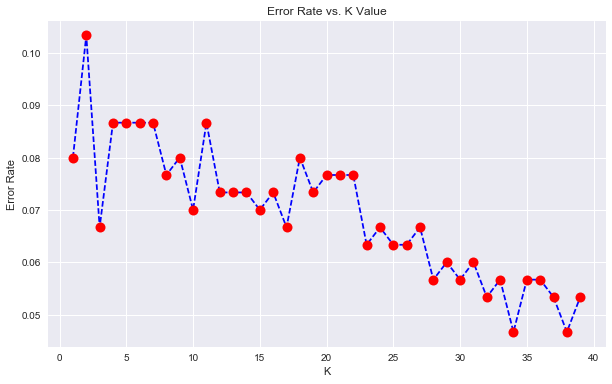

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Aqui podemos ver que depois de aproximadamente K > 23 a taxa de erro tende a pairar em torno de 0.06-0.05. Vamos recapitular o modelo com isso e verificar o relatório de classificação.

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[129  10]
 [ 14 147]]


             precision    recall  f1-score   support

          0       0.90      0.93      0.91       139
          1       0.94      0.91      0.92       161

avg / total       0.92      0.92      0.92       300



In [24]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[127  12]
 [  7 154]]


             precision    recall  f1-score   support

          0       0.95      0.91      0.93       139
          1       0.93      0.96      0.94       161

avg / total       0.94      0.94      0.94       300

